In [1]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

#loads data and split it to train/test

# Set the path for the data
data_path = '/content/drive/MyDrive/Colab_data/brain_tumor_data'


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training')

test_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation')

train_class_counts = train_generator.classes
test_class_counts = test_generator.classes

train_class_count = dict(zip(train_generator.class_indices.keys(), np.zeros(len(train_generator.class_indices), dtype=int)))
test_class_count = dict(zip(test_generator.class_indices.keys(), np.zeros(len(test_generator.class_indices), dtype=int)))

for label in train_class_counts:
    train_class_count[list(train_generator.class_indices.keys())[int(label)]] += 1
    
for label in test_class_counts:
    test_class_count[list(test_generator.class_indices.keys())[int(label)]] += 1

print('Number of samples in each class in the training set:', train_class_count)
print('Number of samples in each class in the testing set:', test_class_count)

2024-02-28 11:22:49.344814: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


FileNotFoundError: [Errno 2] No such file or directory: '/brain_tumor_data'

In [2]:
# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    #***************************Q7-1************************************
])

# Compile the model with appropriate loss and metric
model.compile(optimizer='adam', #******Q7-2******** )

# Train the model 
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)



Epoch 1/2
7/7 [==============================] - 44s 6s/step - loss: 0.7320 - accuracy: 0.6158 - val_loss: 0.6111 - val_accuracy: 0.6200
Epoch 2/2
2/2 [==============================] - 2s 548ms/step - loss: 0.5402 - accuracy: 0.7400
Test accuracy: 0.7400000095367432
2/2 [==============================] - 2s 527ms/step


              precision    recall  f1-score   support

           0       0.58      0.37      0.45        19
           1       0.68      0.84      0.75        31

    accuracy                           0.66        50
   macro avg       0.63      0.60      0.60        50
weighted avg       0.65      0.66      0.64        50



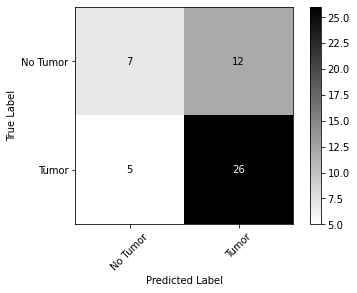

In [3]:
# Evaluation
print(classification_report(test_generator.classes, y_pred))
confusion_mtx = confusion_matrix(test_generator.classes, y_pred)

plt.imshow(confusion_mtx, cmap='binary', interpolation='nearest')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Tumor', 'Tumor'], rotation=45)
plt.yticks(tick_marks, ['No Tumor', 'Tumor'])

thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j]), ha="center", va="center", color="white" if confusion_mtx[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


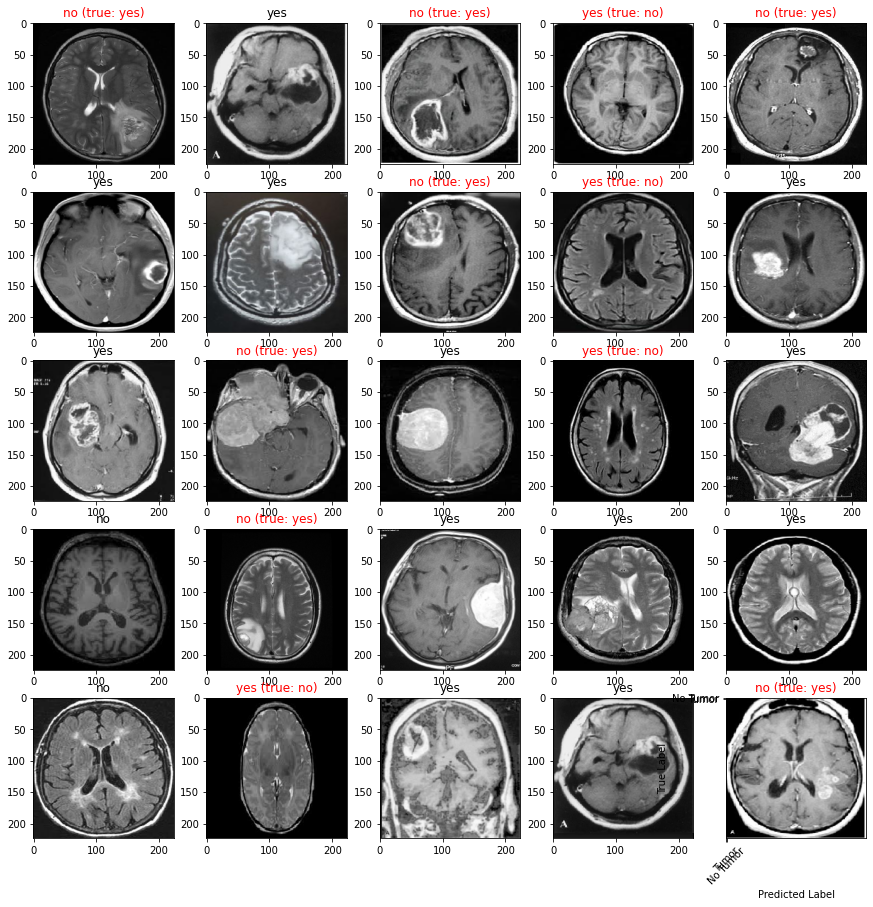

In [4]:

class_names = list(test_generator.class_indices.keys())

# Plot some sample images along with their true label and predicted label
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
for i, (img, true_label, pred_label) in enumerate(zip(test_generator[0][0], test_generator[0][1], y_pred)):
    if (pred_label == true_label):
        axes[i//5, i%5].set_title(class_names[int(true_label)])
    else:
        axes[i//5, i%5].set_title(f'{class_names[int(pred_label)]} (true: {class_names[int(true_label)]})', color='r')
    axes[i//5, i%5].imshow(img)
    
    if i == 24:
        break
        
if i < 24:
    for j in range(i+1, 25):
        axes[j//5, j%5].axis('off')


tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Tumor', 'Tumor'], rotation=45)
plt.yticks(tick_marks, ['No Tumor', 'Tumor'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Define the MLP architecture
model2 = Sequential([
    Flatten(input_shape=(224, 224, 3)),
    #************Q7-4**********************
])

# Compile the model with binary crossentropy loss and accuracy metric
model2.compile(optimizer='adam', #******Q7-5********)

# Train the model for 10 epochs
history = model2.fit(train_generator, epochs=10, validation_data=test_generator)

# Evaluate the model on the test set
test_loss2, test_acc2 = model.evaluate(test_generator)
print('Test accuracy:', test_acc)